<a href="https://colab.research.google.com/github/Sahar-dev/Math-for-data-science/blob/main/Sahar_marzougui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# File: mnist.py
# Author: Sahar Marzougui
# Date: March 6th, 2023
# GitHub repository: https://github.com/Sahar-dev/Mnist_digit/tree/main

# This code is part of the homework assignment for the Deep Learning course at Enetcom University.
# The goal of this assignment is to manipulate the MNIST dataset using a neural network.
# The code includes preprocessing of the dataset, building and training a neural network model, 
# and visualizing the results using confusion matrices and sample images.

# MNIST Neural Network Model Documentation

This neural network model is designed to classify images of handwritten digits from the MNIST dataset. The model consists of two hidden layers, each with 512 units and a rectified linear unit (ReLU) activation function. Dropout with a rate of 0.2 is applied after each hidden layer to prevent overfitting. The output layer has 10 units with a softmax activation function, allowing the model to classify images into one of 10 digits.

## Layers

### Input layer
- Dense layer with 512 units and an input shape of (784,) (flattened 28x28 pixel MNIST images).

### Hidden layers
- Dense layer with 512 units and a ReLU activation function.
- Dropout layer with a dropout rate of 0.2.
- Dense layer with 512 units and a ReLU activation function.
- Dropout layer with a dropout rate of 0.2.

### Output layer
- Dense layer with 10 units and a softmax activation function.

## Parameters

### Activation Functions
- ReLU activation function is used in both hidden layers.
- Softmax activation function is used in the output layer.

### Dropout
- Dropout is applied after each hidden layer with a dropout rate of 0.2.

### Optimizer
- Adam optimizer is used with default learning rate.

### Loss Function
- Categorical cross-entropy loss function is used.

### Epochs and Batch Size
- The model is trained for 50 epochs with a batch size of 100.

## Performance
- The model is evaluated on the MNIST test set.
- The accuracy metric is used to measure the performance of the model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, Activation
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Loading and normalizing data

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Print the unique labels in the training data
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# Print the shapes of the training and testing data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Convert the input data to float32 and scale it within the interval [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
# Reshape the input data to a 1D array of size 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
# Convert the labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print the shape of the one-hot encoded labels
print(y_test.shape)
print(y_train[0])

(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
print(x_train.shape)

(60000, 784)


## Creating the RNN model 

In [9]:

# Define the model architecture
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train,y_train,
               epochs=50,
               validation_data=(x_test,y_test),
               batch_size=100)

Epoch 1/50
600/600 [==============================] - 13s 20ms/step - loss: 0.2395 - accuracy: 0.9286 - val_loss: 0.1105 - val_accuracy: 0.9655
Epoch 2/50
600/600 [==============================] - 11s 19ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0885 - val_accuracy: 0.9728
Epoch 3/50
600/600 [==============================] - 10s 17ms/step - loss: 0.0714 - accuracy: 0.9773 - val_loss: 0.0741 - val_accuracy: 0.9782
Epoch 4/50
600/600 [==============================] - 11s 19ms/step - loss: 0.0570 - accuracy: 0.9813 - val_loss: 0.0647 - val_accuracy: 0.9794
Epoch 5/50
600/600 [==============================] - 11s 19ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0702 - val_accuracy: 0.9796
Epoch 6/50
600/600 [==============================] - 11s 19ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0642 - val_accuracy: 0.9822
Epoch 7/50
600/600 [==============================] - 11s 19ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.0639 - val_accuracy:

The training results show that the model achieves high accuracy on both the training and validation sets, with a final validation accuracy of 0.9852 after 50 epochs. This suggests that the model has learned to generalize well to unseen data, and is likely to perform well on new images from the MNIST dataset. However, it is worth noting that the model may still be **prone to overfitting**.

Best Validation Loss: 0.0571
Best Validation Accuracy: 0.9849


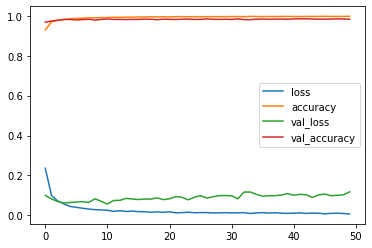

In [ ]:
history_df = pd.DataFrame(hist.history)

history_df.plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

## Making improvements in the model to minimise the overfitting

In [29]:
# Define the model architecture
# Made the dense(256), and increased the dropout to 0.5
model = Sequential()
model.add(Dense(256, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
# Increased the epochs to 55
hist=model.fit(x_train,y_train,
               epochs=55,
               validation_data=(x_test,y_test),
               batch_size=100)

Epoch 1/55
600/600 [==============================] - 4s 4ms/step - loss: 0.4539 - accuracy: 0.8578 - val_loss: 0.1471 - val_accuracy: 0.9553
Epoch 2/55
600/600 [==============================] - 2s 4ms/step - loss: 0.2199 - accuracy: 0.9346 - val_loss: 0.1226 - val_accuracy: 0.9610
Epoch 3/55
600/600 [==============================] - 2s 4ms/step - loss: 0.1771 - accuracy: 0.9471 - val_loss: 0.1009 - val_accuracy: 0.9688
Epoch 4/55
600/600 [==============================] - 3s 5ms/step - loss: 0.1537 - accuracy: 0.9532 - val_loss: 0.0941 - val_accuracy: 0.9710
Epoch 5/55
600/600 [==============================] - 2s 4ms/step - loss: 0.1419 - accuracy: 0.9576 - val_loss: 0.0904 - val_accuracy: 0.9746
Epoch 6/55
600/600 [==============================] - 2s 4ms/step - loss: 0.1273 - accuracy: 0.9620 - val_loss: 0.0818 - val_accuracy: 0.9765
Epoch 7/55
600/600 [==============================] - 3s 4ms/step - loss: 0.1189 - accuracy: 0.9636 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 

Best Validation Loss: 0.0579
Best Validation Accuracy: 0.9847


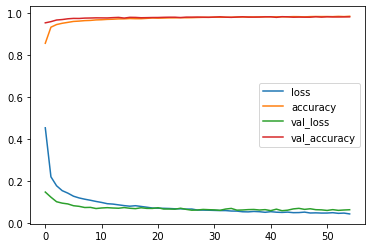

In [32]:
history_df = pd.DataFrame(hist.history)

history_df.plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

## Checking the results

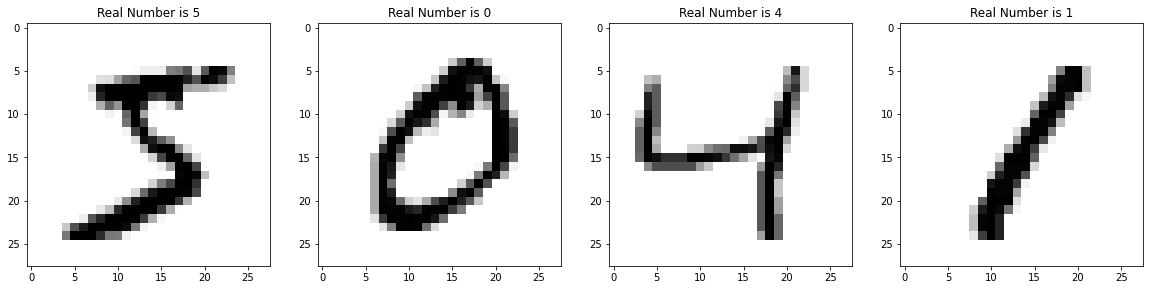

In [ ]:
# Reshape the training images to plot them
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)

# Plot first 4 images in the training set with their true labels
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

### Confusion matrix

313/313 [==============================] - 1s 4ms/step


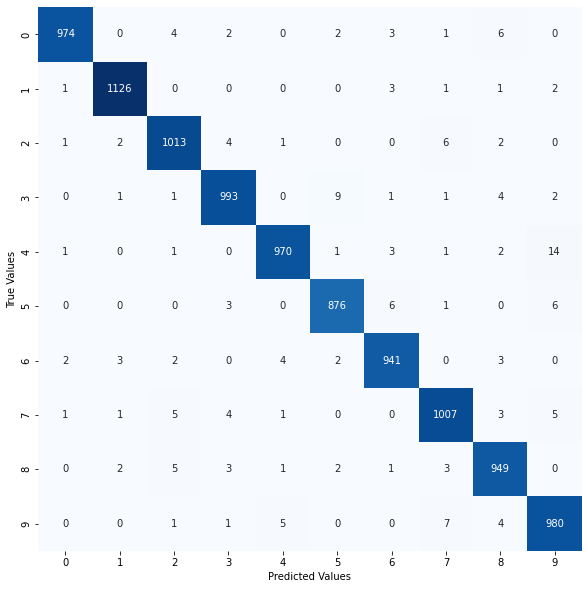

In [ ]:
# Predict the class probabilities for the test set
fig = plt.figure(figsize=(10, 10)) # Set Figure
y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels 
Y_test = np.argmax(y_test, 1) # Decode labels
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


### Plot first 16 images in the test set with their true and predicted labels

313/313 [==============================] - 1s 4ms/step


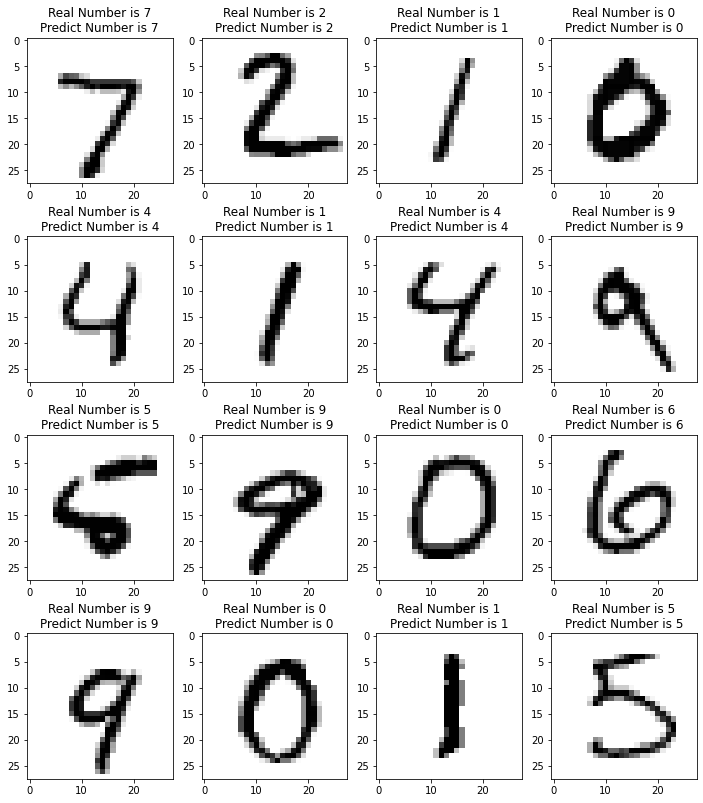

In [ ]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

# MNIST CNN Model Documentation
This Convolutional Neural Network (CNN) model is designed to classify images of handwritten digits from the MNIST dataset. The model consists of two convolutional layers followed by two max pooling layers, one flatten layer, and two dense layers. The first convolutional layer has 32 filters with a 3x3 kernel size, and the second convolutional layer has 64 filters with a 3x3 kernel size. ReLU activation function is applied after each convolutional layer. Max pooling is applied with a 2x2 pool size after each convolutional layer to reduce the dimensionality of the output. The output of the second max pooling layer is flattened into a 1D array, which is then passed through a dense layer with 128 units and a ReLU activation function. Finally, a dense layer with 10 units and a softmax activation function is applied, allowing the model to classify images into one of 10 digits.

## Layers
### Input layer
* Conv2D layer with 32 filters, a 3x3 kernel size, and a ReLU activation function. Input shape is (28, 28, 1) for grayscale images.

### Hidden layers
* MaxPooling2D layer with a 2x2 pool size after the first Conv2D layer.
* Conv2D layer with 64 filters, a 3x3 kernel size, and a ReLU activation function.
* MaxPooling2D layer with a 2x2 pool size after the second Conv2D layer.
* Flatten layer to convert the output of the second MaxPooling2D layer into a 1D array.
* Dense layer with 128 units and a ReLU activation function.
### Output layer
* Dense layer with 10 units and a softmax activation function.

## Parameters
### Activation Functions
* ReLU activation function is used in both convolutional layers and the first dense layer.
* Softmax activation function is used in the output layer.

### Optimizer
* Adam optimizer is used with default learning rate.
### Loss Function
* Sparse categorical cross-entropy loss function is used.
### Epochs and Batch Size
* The model is trained for 10 epochs with a batch size of 32.

## Performance
The model is evaluated on the MNIST test set.
The accuracy metric is used to measure the performance of the model.

## Preparing the data

In [42]:
from keras import layers
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Reshape and normalize the data
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

In [43]:
train_images.shape

(60000, 28, 28, 1)

## Creating the model

In [37]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.1300 - accuracy: 0.9600 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0301 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0300 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0382 - val_accur

Best Validation Loss: 0.0289
Best Validation Accuracy: 0.9917


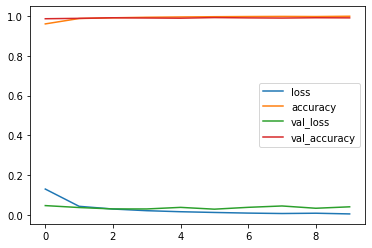

In [38]:
history_df = pd.DataFrame(history.history)

history_df.plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

The model achieved an accuracy of 99.03% on the test set after training for 10 epochs. Looking at the training and validation accuracy over time, it seems that the model continued to improve throughout the training process, with the training accuracy steadily increasing and the validation accuracy staying close behind.

The loss function also decreased consistently during training, indicating that the model was learning and becoming better at predicting the correct output for each input image.

Overall, these results suggest that the model is performing very well on the MNIST dataset. It is able to accurately classify handwritten digits with a high degree of accuracy, and the training process seems to have been successful in optimizing the model's parameters to improve its performance.

## Checking the results

313/313 [==============================] - 1s 2ms/step


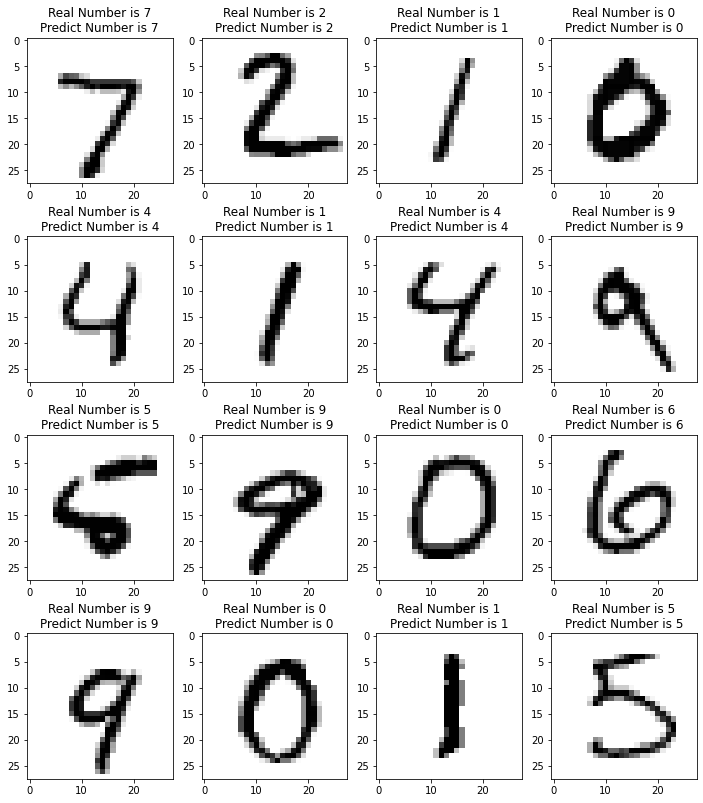

In [41]:
y_pred = model.predict(test_images)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

# Conclusion

The second model, which used a convolutional neural network (CNN), achieved a higher accuracy than the first model, which used a simple RNN. The CNN model achieved an accuracy of 99.03% on the test data, while the RNN model achieved an accuracy of 98,38%.

This is because CNNs are specifically designed to work well with images and other spatial data, as they are able to extract important features from the data through convolutional layers.

This highlights the importance of using a model that is appropriate for the type of data being analyzed.